## Introduction

## Importing the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

np.random.seed(2)

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('creditcard.csv')

## EDA

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset is anonymised therefore we do not know who has triggered the transaction. But we have the transaction amount and the class 0 being non-fradulent and 1 corresponding to fradulent transaction.

### Normalise the range

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
dataset['normalisedAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset = dataset.drop(['Amount'], axis = 1)

In [6]:
dataset = dataset.drop(['Time'], axis=1)

In [7]:
dataset.head() #Check

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalisedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
#Splitting the target variable from the rest of the dataset
X = dataset.iloc[:, dataset.columns != 'Class']
y = dataset.iloc[:, dataset.columns == 'Class']

In [56]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalisedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [57]:
X.shape

(284807, 29)

In [10]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Splitting Dataset into Training and Testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.shape

(199364, 29)

In [14]:
X_test.shape

(85443, 29)

### Transforming Dataset into Numpy Arrays for NNs

In [15]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

## Deep Neural Network

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [17]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid') #Sigmoid due to Binary Classification
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [19]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
199364/199364 [==============================] - 15s 76us/step - loss: 0.0100 - acc: 0.9979 1
Epoch 2/5
199364/199364 [==============================] - 13s 67us/step - loss: 0.0039 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 13s 66us/step - loss: 0.0035 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 13s 66us/step - loss: 0.0034 - acc: 0.9993
Epoch 5/5
199364/199364 [==============================] - 13s 65us/step - loss: 0.0032 - acc: 0.9994


In [20]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 13us/step


In [21]:
print(score)

[0.004166359790305179, 0.9994148145547324]


## Confusion Matrix

In [22]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [24]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [ ]:
print(cnf_matrix)

In [27]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85278    18]
 [   32   115]]


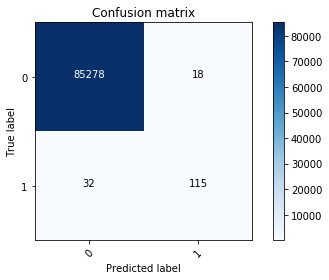

In [28]:
plot_confusion_matrix(cnf_matrix, classes = [0, 1])
plt.show()

Confusion matrix, without normalization
[[284254     61]
 [   105    387]]


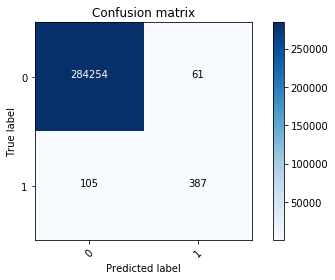

In [30]:
#Looking from the complete dataset perspective
y_pred2 = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix2 = confusion_matrix(y_expected, y_pred2.round())
plot_confusion_matrix(cnf_matrix2, classes = [0, 1])
plt.show()

We can see that 105 people were predicted as non-fradulent but were fradulent, so we will try another model to see if we can improve upon this.

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)

In [35]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [36]:
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred_rf = random_forest.predict(X_test)

In [39]:
random_forest.score(X_test, y_test)

0.9995084442259752

### Confusion Matrix

In [41]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


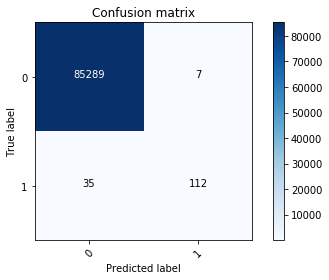

In [42]:
plot_confusion_matrix(conf_matrix_rf, classes = [0, 1])

Much Better than Deep Neural Networks

In [54]:
y_pred_rf2 = random_forest.predict(X)


In [55]:
y_pred_rf2.shape

(284807,)

In [72]:
conf_matrix_rf2 = confusion_matrix(y_expected, y_pred_rf2.round())

Confusion matrix, without normalization
[[284308      7]
 [    35    457]]


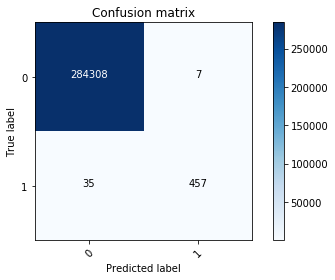

In [73]:
plot_confusion_matrix(conf_matrix_rf2, classes = [0, 1])
plt.show()

We have now only 35 signalled as Type II error, i.e. False Positive so we will apply one final model to see if we can improve

## Decision Trees

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
decision_tree = DecisionTreeClassifier()

In [67]:
decision_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
y_pred_dtree = decision_tree.predict(X_test)

### Confusion Matrix

In [70]:
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)

Confusion matrix, without normalization
[[85266    30]
 [   38   109]]


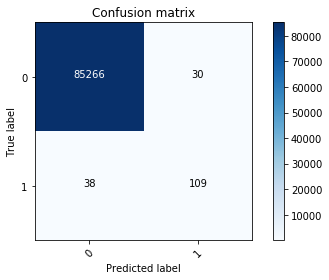

In [71]:
plot_confusion_matrix(conf_matrix_dtree, classes = [0, 1])
plt.show()

### Confusion Matrix for the Whole Dataset

In [74]:
y_predict_dtree2 = decision_tree.predict(X)

In [75]:
conf_matrix_dtree2 = confusion_matrix(y_expected, y_predict_dtree2)

Confusion matrix, without normalization
[[284285     30]
 [    38    454]]


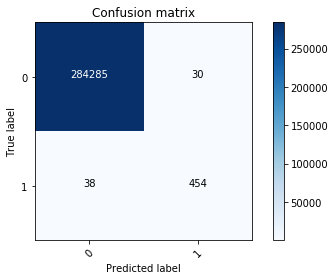

In [76]:
plot_confusion_matrix(conf_matrix_dtree2, classes = [0, 1])
plt.show()

Decision Tree got very close to the Random Forest so we can choose that model. But first we will try sampling

## Undersampling

In [77]:
fraud_indices = np.array(dataset[dataset.Class == 1].index)
number_of_frauds = len(fraud_indices)
print(number_of_frauds)

492


In [80]:
normal_indices = dataset[dataset.Class == 0].index

In [83]:
random_normal_indices = np.random.choice(normal_indices, number_of_frauds, replace = False)
random_normal_indices = np.array(random_normal_indices)

In [84]:
under_sampled_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sampled_indices))

984


In [86]:
under_sample_data = dataset.iloc[under_sampled_indices,:]

In [87]:
X_undersampled = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersampled = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [88]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled, test_size=0.3)

In [89]:
X_train_us = np.array(X_train_us)
X_test_us = np.array(X_test_us)
y_train_us = np.array(y_train_us)
y_test_us = np.array(y_test_us)

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train_us, y_train_us, batch_size=15, epochs = 5)

Epoch 1/5
688/688 [==============================] - 1s 884us/step - loss: 0.6015 - acc: 0.8983
Epoch 2/5
688/688 [==============================] - 0s 83us/step - loss: 0.2761 - acc: 0.9288
Epoch 3/5
688/688 [==============================] - 0s 85us/step - loss: 0.2069 - acc: 0.9317
Epoch 4/5
688/688 [==============================] - 0s 70us/step - loss: 0.1731 - acc: 0.9331
Epoch 5/5
688/688 [==============================] - 0s 75us/step - loss: 0.1750 - acc: 0.9404


In [93]:
y_pred_us = model.predict(X_test_us)
y_expected_us = pd.DataFrame(y_test_us)
conf_matrix_us = confusion_matrix(y_expected_us, y_pred_us.round())

Confusion matrix, without normalization
[[132   0]
 [ 21 143]]


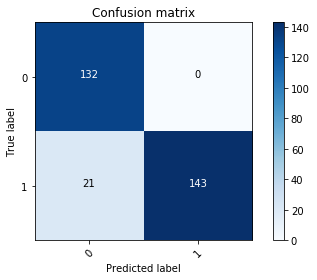

In [94]:
plot_confusion_matrix(conf_matrix_us, classes = [0,1])
plt.show()

## SMOTE

In [100]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

In [103]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)

In [104]:
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample,
                                                                                        y_resample,
                                                                                        test_size=0.3)

In [105]:
X_train_resample = np.array(X_train_resample)
X_test_resample = np.array(X_test_resample)
y_train_resample = np.array(y_train_resample)
y_test_resample = np.array(y_test_resample)

In [106]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train_resample, y_train_resample, batch_size = 15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 82s 207us/step - loss: 0.0345 - acc: 0.9884
Epoch 2/5
398041/398041 [==============================] - 77s 194us/step - loss: 0.0147 - acc: 0.9963
Epoch 3/5
398041/398041 [==============================] - 76s 191us/step - loss: 0.0114 - acc: 0.9971
Epoch 4/5
398041/398041 [==============================] - 76s 191us/step - loss: 0.0104 - acc: 0.9974
Epoch 5/5
398041/398041 [==============================] - 75s 189us/step - loss: 0.0096 - acc: 0.9977


In [107]:
y_pred_resample = model.predict(X_test_resample)
y_expected_resample = pd.DataFrame(y_test_resample)
conf_matrix_resample = confusion_matrix(y_expected_resample, y_pred_resample.round())

Confusion matrix, without normalization
[[84708   469]
 [  103 85309]]


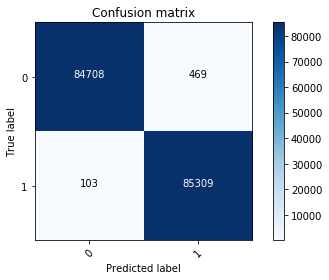

In [108]:
plot_confusion_matrix(conf_matrix_resample, classes = [0,1])
plt.show()